# 1 st pgm

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('lab1.csv')
data
features=np.array(data)[:,:-1]
features
target=np.array(data)[:,-1]
target
for i,val in enumerate(target):
    if val=='yes':
        specific_h=features[i].copy()
        break
print(specific_h)
for i,val in enumerate(features):
    if target[i]=='yes':
        for x in range(len(specific_h)):
            if val[x]!=specific_h[x]:
                specific_h[x]='?'
print(specific_h)

['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
['sunny' 'warm' '?' 'strong' '?' '?']


# 2  pgm

In [6]:
import numpy as np
import pandas as pd
data=pd.read_csv('lab1.csv')

features=np.array(data)[:,:-1]

target=np.array(data)[:,-1]

specific_h=features[0].copy()
print("initilazation of specific_h and general_h")
print(specific_h)
general_h=[["?"for  i in range(len(specific_h))]for i in range(len(specific_h))]
print(general_h)
for i,h in enumerate(features):
    if target[i]=="yes":
        for x in range(len(specific_h)):
            if h[x]!=specific_h[x]:
                specific_h[x]='?'
                general_h[x][x]='?'
    if target[i]=="no":
        for x in range(len(specific_h)):
            if h[x]!=specific_h[x]:
                general_h[x][x]=specific_h[x]
            else:
                general_h[x][x]='?'
print(specific_h,"\n")
print(general_h,"\n")
indices=[i for i,val in enumerate(general_h)if val==['?','?','?','?','?','?']]
for i in indices:
    general_h.remove(['?','?','?','?','?','?'])
print("\n final specific_h",specific_h,sep="\n")
print("\n final general_h",general_h,sep="\n")


initilazation of specific_h and general_h
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
['sunny' 'warm' '?' 'strong' '?' '?'] 

[['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']] 


 final specific_h
['sunny' 'warm' '?' 'strong' '?' '?']

 final general_h
[['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?']]


## 3 pgm

In [2]:
import pandas as pd
from collections import Counter
import math
tennis=pd.read_csv('playtennis.csv')
print("\n Given Play Tennis Data Set:\n\n",tennis)
def entropy(alist):
    c=Counter(x for x in alist)
    instances=len(alist)
    prob=[x / instances for x in c.values()]
    return sum( [-p*math.log(p,2)for p in prob])
def information_gain(d,split,target):
    splitting=d.groupby(split)
    n=len(d.index)
    agent=splitting.agg({target :[entropy,lambda x:len(x)/n]})[target]
    agent.columns=['entropy','observations']
    newentropy=sum(agent['entropy']* agent['observations'])
    oldentropy=entropy(d[target])
    return oldentropy-newentropy
def id3(sub,target,a):
    count=Counter(x for x in sub[target])
    if len(count)==1:
        return next(iter(count))
    else:
        gain =[information_gain(sub,attr,target)for attr in a]
        print("\n Gain=",gain)
        maximum=gain.index(max(gain))
        best=a[maximum]
        print("\n best attribute:",best)
        tree={best:{}}
        remaining=[i for i in a if i != best]
        
        for val,subset in sub.groupby(best):
            subtree=id3(subset,target,remaining)
            tree[best][val]=subtree
        return tree
names=list(tennis.columns)
print("\n List of Attributes:", names)
names.remove('PlayTennis')
print("\n predicting Attributes:",names)

tree=id3(tennis,'PlayTennis',names)
print("\n The resultant decision tree is :\n")
print(tree)


 Given Play Tennis Data Set:

    PlayTennis   Outlook Temperature Humidity    Wind
0          No     Sunny         Hot     High    Weak
1          No     Sunny         Hot     High  Strong
2         Yes  Overcast         Hot     High    Weak
3         Yes      Rain        Mild     High    Weak
4         Yes      Rain        Cool   Normal    Weak
5          No      Rain        Cool   Normal  Strong
6         Yes  Overcast        Cool   Normal  Strong
7          No     Sunny        Mild     High    Weak
8         Yes     Sunny        Cool   Normal    Weak
9         Yes      Rain        Mild   Normal    Weak
10        Yes     Sunny        Mild   Normal  Strong
11        Yes  Overcast        Mild     High  Strong
12        Yes  Overcast         Hot   Normal    Weak
13         No      Rain        Mild     High  Strong

 List of Attributes: ['PlayTennis', 'Outlook', 'Temperature', 'Humidity', 'Wind']

 predicting Attributes: ['Outlook', 'Temperature', 'Humidity', 'Wind']

 Gain= [0.2467498

# 4 pgm

In [1]:
import numpy as np
x = np.array(([2,9],[1,5],[3,6]),dtype = float)
y = np.array(([92],[86],[89]),dtype = float)
x = x/np.amax(x,axis = 0)
y = y/100
def sigmoid(x):
    return 1/(1+np.exp(-x))
def derivatives_sigmoid(x):
    return x*(1-x)

epoch = 7000
lr = 0.1
inputlayer_neurons = 2
hiddenlayer_neurons = 3
output_neurons = 1

wh = np.random.uniform(size = (inputlayer_neurons,hiddenlayer_neurons))
bh = np.random.uniform(size = (1,hiddenlayer_neurons))
wout = np.random.uniform(size = (hiddenlayer_neurons,output_neurons))
bout = np.random.uniform(size = (1,output_neurons))

for i in range(epoch):
    hinp1 = np.dot(x,wh)
    hinp = hinp1 + bh
    wayer_act = sigmoid(hinp)
    outinp1 = np.dot(wayer_act,wout)
    outinp = outinp1 + bout
    output = sigmoid(outinp)
    
    EO = y-output
    outgrad = derivatives_sigmoid(output)
    d_output = EO*outgrad
    EH = d_output.dot(wout.T)
    hiddengrad = derivatives_sigmoid(wayer_act)
    d_hiddengrad = EH*hiddengrad
    wout +=wayer_act.T.dot(d_output)*lr
    
print("Input:\n"+str(x))
print("Actual output:\n"+str(y))
print("Predicted output:\n",output)

Input:
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual output:
[[0.92]
 [0.86]
 [0.89]]
Predicted output:
 [[0.89487324]
 [0.87729565]
 [0.89721171]]


# 5 pgm

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn import metrics

data=pd.read_csv("lab5.csv",names=['message','label'])
print('The dataset is',data)
print('The dimensions of the dataset',data.shape)
data['labelnum']=data.label.map({'pos':1,'neg':0})
x=data.message
y=data.labelnum
print(x)
print(y)
vectorizer=TfidfVectorizer()
data=vectorizer.fit_transform(x)
print('\n the featres of dataset:\n')

df=pd.DataFrame(data.toarray(),columns=vectorizer.get_feature_names_out())
df.head()

print('\n Train Test Split')
xtrain,xtest,ytrain,ytest=train_test_split(data,y,test_size=0.3,random_state=42)
print('\n The total number of traning data:',ytrain.shape)
print('\n The total number of testdata data:',ytest.shape)

clf=MultinomialNB().fit(xtrain,ytrain)
predict=clf.predict(xtest)
predicted=clf.predict(xtest)
print('\n Accuracy of the classifier is',metrics.accuracy_score(ytest,predicted))
print('\n Confusion matric is\n',metrics.confusion_matrix(ytest,predicted))
print('\n Classification report is\n',metrics.classification_report(ytest,predicted))
print('\n Value of precision is\n',metrics.precision_score(ytest,predicted))
print('\n Value of Recall is\n',metrics.recall_score(ytest,predicted))


The dataset is                                   message label
0                        i love sandwitch   pos
1                this is an amazing place   pos
2      i feel very good about these beers   pos
3                    this is my best work   pos
4                    what an awesome view   pos
5            i do not like this restraunt   neg
6                i am tired of this stuff   neg
7                  i can't deal with this   neg
8                    he is my sworn enemy   neg
9                     my boss is horrible   neg
10               this is an awesome place   pos
11  i do not like the taste of this juice   neg
12                        i love to dance   pos
13      i am sick and tired of this place   neg
14                   what a great holiday   pos
15           that is bad locality to stay   neg
16        we will have good fun tommorrow   pos
17       i went to my enemy's house today   neg
The dimensions of the dataset (18, 2)
0                          i love s

## 6 pgm

In [6]:
import pandas as pd
col=['Age','Gender','FamilyHist','Diet','Lifestyle','Cholesterol','HeartDisease']
data=pd.read_csv('lab6.csv',names=col)
print(data)

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in range(len(col)):
    data.iloc[:,i]=encoder.fit_transform(data.iloc[:,i].astype(str))
    
x=data.iloc[:,0:6]
y=data.iloc[:,-1].astype(int)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

from sklearn.metrics import confusion_matrix
print('confusion matrix',confusion_matrix(y_test,y_pred))

                   Age  Gender FamilyHist    Diet Lifestyle Cholesterol  \
0   SuperSeniorCitizen    Male        Yes  Medium  Sedetary        High   
1   SuperSeniorCitizen  Female        Yes  Medium  Sedetary        High   
2        SeniorCitizen    Male         No    High  Moderate  BorderLine   
3                 Teen    Male        Yes  Medium  Sedetary      Normal   
4                Youth  Female        Yes    High   Athlete      Normal   
5           MiddleAged    Male        Yes  Medium    Active        High   
6                 Teen    Male        Yes    High  Moderate        High   
7   SuperSeniorCitizen    Male        Yes  Medium  Sedetary        High   
8                Youth  Female        Yes    High   Athlete      Normal   
9        SeniorCitizen  Female         No    High   Athlete      Normal   
10                Teen  Female         No  Medium  Moderate        High   
11                Teen    Male        Yes  Medium  Sedetary      Normal   
12          MiddleAged  F

C:\Users\MicroApt\AppData\Local\Temp\ipykernel_13736\4041856135.py:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,i]=encoder.fit_transform(data.iloc[:,i].astype(str))
C:\Users\MicroApt\AppData\Local\Temp\ipykernel_13736\4041856135.py:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,i]=encoder.fit_transform(data.iloc[:,i].astype(str))
C:\Users\MicroApt\AppData\Local\Temp\ipykernel_13736\4041856135.py:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead 

## 7 pgm

Input Data and Shape
(25, 2)
X  [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]]
Graph for whole dataset


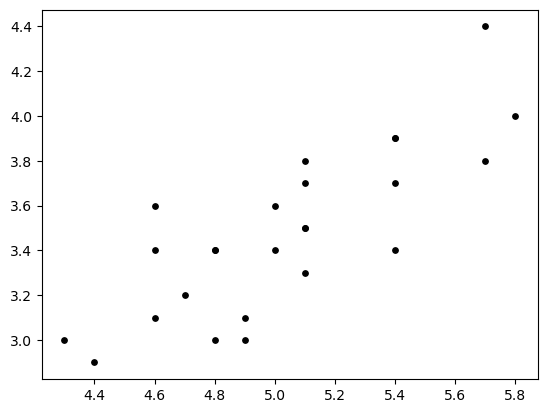

C:\Users\MicroApt\OneDrive\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MicroApt\OneDrive\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\MicroApt\OneDrive\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\MicroApt\OneDrive\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs,

labels	 [5 8 2 2 5 0 1 5 6 8 0 1 8 6 7 4 0 5 7 3 9 3 1 5 1]
centroids	 [[5.4        3.83333333]
 [4.7        3.45      ]
 [4.65       3.15      ]
 [5.1        3.75      ]
 [5.7        4.4       ]
 [5.06       3.46      ]
 [4.35       2.95      ]
 [5.75       3.9       ]
 [4.86666667 3.03333333]
 [5.4        3.4       ]]
Graph using Kmeans Algorithm


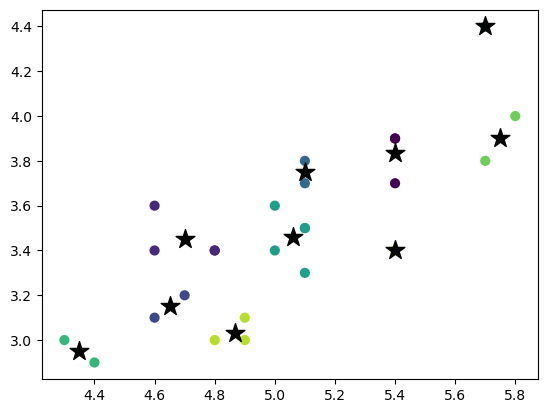

Graph using EM Algorithm


C:\Users\MicroApt\OneDrive\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


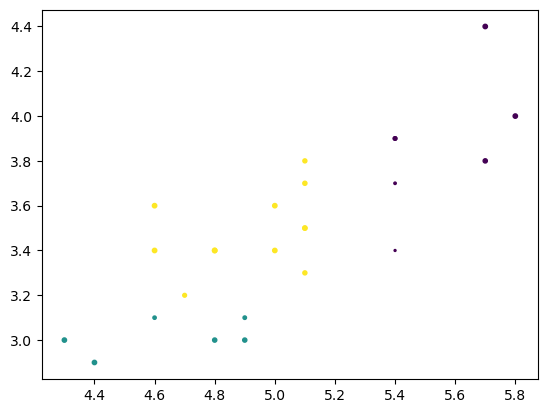

In [7]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture 
from sklearn.cluster import KMeans
data = pd.read_csv('lab7.csv') 
print("Input Data and Shape") 
print(data.shape)
data.head()

f1 = data['V1'].values 
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))

print("X ", X)
print('Graph for whole dataset') 
plt.scatter(f1, f2, c='black', s=15)
plt.show()

kmeans = KMeans(10, random_state=42) 
labels = kmeans.fit(X).predict(X) 
print("labels	",labels)
centroids = kmeans.cluster_centers_ 
print("centroids	",centroids)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis'); 
print('Graph using Kmeans Algorithm')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')
plt.show()
gmm = GaussianMixture(n_components=3).fit(X) 
labels = gmm.predict(X)

probs = gmm.predict_proba(X) 
size = 10 * probs.max(1) ** 3
print('Graph using EM Algorithm')

plt.scatter(X[:, 0], X[:, 1], c=labels, s=size, cmap='viridis');
plt.show()




##  8 pgm

In [12]:
import csv
import random
import math
import operator
def loadDataset(filename, split, trainingSet=[], testSet=[]):
    with open(filename) as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)-1):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]
 
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

def main():
# prepare data
    trainingSet=[]
    testSet=[] 
    split = 0.67
    loadDataset('iris_data.csv', split, trainingSet, testSet)
    print ('\n Number of Training data: ' + (repr(len(trainingSet))))
    print (' Number of Test Data: ' + (repr(len(testSet))))
# generate predictions
    predictions=[]
    k = 3
    print('\n The predictions are: ')
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        print(' predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print('\n The Accuracy is: ' + repr(accuracy) + '%')

main()




 Number of Training data: 107
 Number of Test Data: 42

 The predictions are: 
 predicted='Iris-setosa', actual='Iris-setosa'
 predicted='Iris-setosa', actual='Iris-setosa'
 predicted='Iris-setosa', actual='Iris-setosa'
 predicted='Iris-setosa', actual='Iris-setosa'
 predicted='Iris-setosa', actual='Iris-setosa'
 predicted='Iris-setosa', actual='Iris-setosa'
 predicted='Iris-setosa', actual='Iris-setosa'
 predicted='Iris-setosa', actual='Iris-setosa'
 predicted='Iris-setosa', actual='Iris-setosa'
 predicted='Iris-setosa', actual='Iris-setosa'
 predicted='Iris-versicolor', actual='Iris-versicolor'
 predicted='Iris-versicolor', actual='Iris-versicolor'
 predicted='Iris-versicolor', actual='Iris-versicolor'
 predicted='Iris-versicolor', actual='Iris-versicolor'
 predicted='Iris-versicolor', actual='Iris-versicolor'
 predicted='Iris-versicolor', actual='Iris-versicolor'
 predicted='Iris-versicolor', actual='Iris-versicolor'
 predicted='Iris-virginica', actual='Iris-versicolor'
 predicted=

## 9 pgm

[16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78 10.27 35.26
 15.42 18.43 14.83]
15
500


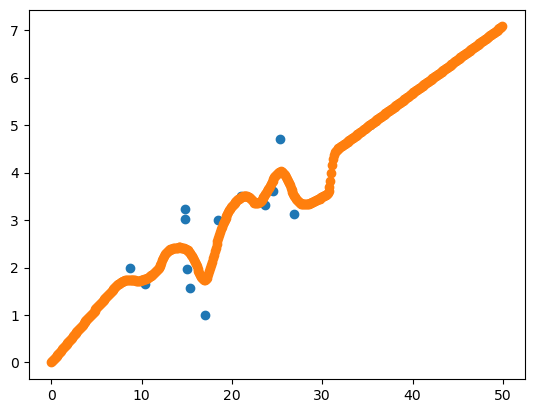

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
tou = 1
data=pd.read_csv("lab9.csv") 
X_train = np.array(data.total_bill) 
print(X_train)
X_train = X_train[:, np.newaxis] 
print(len(X_train))
y_train = np.array(data.tip)

X_test = np.array([i /10 for i in range(500)]) 
X_test = X_test[:, np.newaxis]
y_test = [] 
count = 0
for r in range(len(X_test)):
    wts = np.exp(-np.sum((X_train - X_test[r]) ** 2, axis=1) / (2 * tou ** 2)) 
    W = np.diag(wts)
    factor1 = np.linalg.inv(X_train.T.dot(W).dot(X_train)) #factor=XT.W.X
    parameters = factor1.dot(X_train.T).dot(W).dot(y_train) #parameters=factor.XT.W.Y 
    prediction = X_test[r].dot(parameters) #X.Theta
    y_test.append(prediction)
    count += 1 
print(len(y_test))
y_test = np.array(y_test) 
plt.plot(X_train.squeeze(), y_train, 'o')

plt.plot(X_test.squeeze(), y_test, 'o') 
plt.show()



# 10 pgm

Accuracy score  1.0


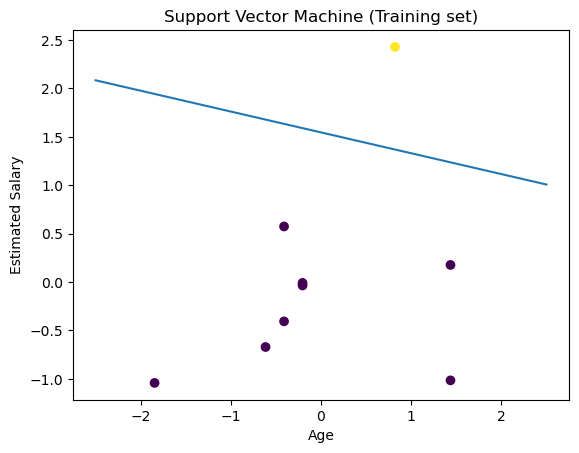

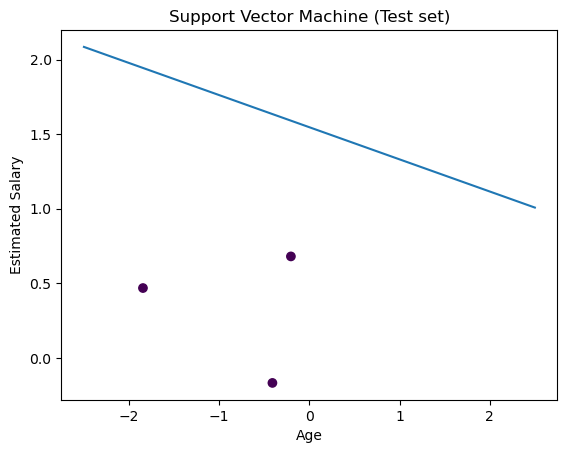

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
datasets = pd.read_csv('lab10.csv')
X = datasets.iloc[:, [2,3]].values
Y = datasets.iloc[:, 4].values
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25,
random_state = 0)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_Train, Y_Train)
Y_Pred = classifier.predict(X_Test)
from sklearn import metrics
print("Accuracy score ",metrics.accuracy_score(Y_Test, Y_Pred))
plt.scatter(X_Train[:,0], X_Train[:, 1],c=Y_Train)
plt.title('Support Vector Machine (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
w=classifier.coef_[0]
a=-w[0]/w[1]
xx=np.linspace(-2.5,2.5)
yy=a*xx -(classifier.intercept_[0])/w[1]
plt.plot(xx,yy)
plt.show();
plt.scatter(X_Test[:,0], X_Test[:, 1],c=Y_Test)
plt.title('Support Vector Machine (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
w=classifier.coef_[0]
a=-w[0]/w[1]
xx=np.linspace(-2.5,2.5)
yy=a*xx -(classifier.intercept_[0])/w[1]
plt.plot(xx,yy)
plt.show();
